# Classification Evaluation Metrics Practice

1. Load the Wisconsin breast cancer data from sklearn (binary classification problem), do a train/test split, and fit a logistic regression and 10 nearest neighbors model. Instead of using any built-in sklearn scoring methods, write your own accuracy, precision, recall, and F1 evaluation functions that take arrays of actual and predicted target labels as arguments. Score your models on the test set.
    * e.g.  `def accuracy(actuals, preds)`

In [6]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

bc_dataset = load_breast_cancer()
X = pd.DataFrame(bc_dataset.data)
X.columns = bc_dataset.feature_names
y = bc_dataset.target

#Split data into 3: 60% train, 20% validation, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
408,17.99,20.66,117.80,991.7,0.10360,0.13040,0.120100,0.088240,0.1992,0.06069,...,21.080,25.41,138.1,1349.0,0.14820,0.37350,0.33010,0.19740,0.3060,0.08503
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.2,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
307,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,0.1788,0.06833,...,9.699,20.07,60.9,285.5,0.09861,0.05232,0.01472,0.01389,0.2991,0.07804


Evaluation metrics:

In [2]:
def accuracy(actuals, preds):
    return np.mean(actuals == preds)

def precision(actuals, preds):
    tp = np.sum((actuals == 1) & (preds == 1))
    fp = np.sum((actuals == 0) & (preds == 1))
    return tp / (tp + fp)

def recall(actuals, preds):
    tp = np.sum((actuals == 1) & (preds == 1))
    fn = np.sum((actuals == 1) & (preds == 0))
    return tp / (tp + fn)

def F1(actuals, preds):
    p, r = precision(actuals, preds), recall(actuals, preds)
    return 2*p*r / (p + r)

Fitting and evaluating the models:

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression(C = 1000000) #large C means no regularization, confusing! (inverse regularization strength)
knn = KNeighborsClassifier(n_neighbors = 10)

lr.fit(X_train, y_train)
knn.fit(X_train, y_train)

print('Logistic regression validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, lr.predict(X_test)), 
         precision(y_test, lr.predict(X_test)), 
         recall(y_test, lr.predict(X_test)),
         F1(y_test, lr.predict(X_test))
        )
     )

print('\n')

print('10 nearest neighbors validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, knn.predict(X_test)), 
         precision(y_test, knn.predict(X_test)), 
         recall(y_test, knn.predict(X_test)),
         F1(y_test, knn.predict(X_test))
        )
     )

Logistic regression validation metrics: 
 Accuracy: 0.9649 
 Precision: 0.9595 
 Recall: 0.9861 
 F1: 0.9726


10 nearest neighbors validation metrics: 
 Accuracy: 0.9298 
 Precision: 0.9103 
 Recall: 0.9861 
 F1: 0.9467


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


2: Write your own function for generating an ROC curve plot from model predictions without using sklearn's assistance. Remember that ROC plots true positive rate (recall) vs. false positive rate for a given probability decision threshold. So you should loop over a range of probability cutoffs from 1 to 0, convert a model's predicted probabilities (`model.predict_proba()[:,1]`) to target labels using each cutoff, and plot the results as a curve.   

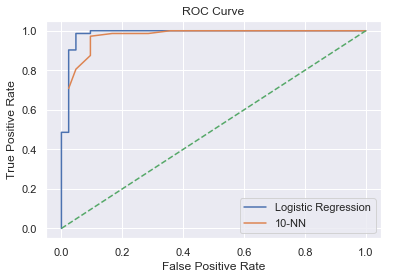

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

def fpr(actuals, preds):
    fp = np.sum((actuals == 0) & (preds == 1))
    tn = np.sum((actuals == 0) & (preds == 0))
    return fp / (fp + tn)    

def plot_ROC_curve(model, X, y):
    
    probs = model.predict_proba(X)[:,1]
    fprs, tprs = [],[]
    
    for p in np.linspace(1,0,100000):
        preds = probs >= p
        fprs.append(fpr(y, preds))
        tprs.append(recall(y, preds))
       
    plt.plot(fprs, tprs)
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
            
plot_ROC_curve(lr, X_test, y_test) 
plot_ROC_curve(knn, X_test, y_test) 
x = np.linspace(0, 1, 100000)
plt.plot(x, x, linestyle='--')
plt.legend(['Logistic Regression','10-NN'])

Finally, here's how we could do the same thing with sklearn. Note that it's Both more granular and more efficient than ours :)

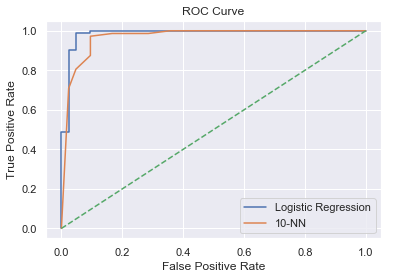

In [5]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)

x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Logistic Regression','10-NN'])